# scplotter to work with SlideSeq data prepared by Seurat

See: <https://satijalab.org/seurat/articles/spatial_vignette#slide-seq>

Go back to scplotter documentation: <https://pwwang.github.io/scplotter/>

In [1]:
options(future.globals.maxSize = 512 * 1024^3) # 512 GB
suppressPackageStartupMessages({
    library(Seurat)
    library(SeuratData)
})
# Load the scplotter package
# library(scplotter)
devtools::load_all()
# devtools::load_all("../../../plotthis")

suppressWarnings(suppressMessages({
    # InstallData("ssHippo")

    slide.seq <- LoadData("ssHippo")
    slide.seq <- SCTransform(slide.seq, assay = "Spatial", ncells = 3000, verbose = FALSE)
    slide.seq <- RunPCA(slide.seq)
    slide.seq <- RunUMAP(slide.seq, dims = 1:30)
    slide.seq <- FindNeighbors(slide.seq, dims = 1:30)
    slide.seq <- FindClusters(slide.seq, resolution = 0.3, verbose = FALSE)
}))
# slide.seq <- qs2::qs_read("data/slide.seq.qs")
slide.seq

ℹ Loading scplotter


An object of class Seurat 
42639 features across 53173 samples within 2 assays 
Active assay: SCT (19375 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: Spatial
 2 dimensional reductions calculated: pca, umap
 1 image present: image

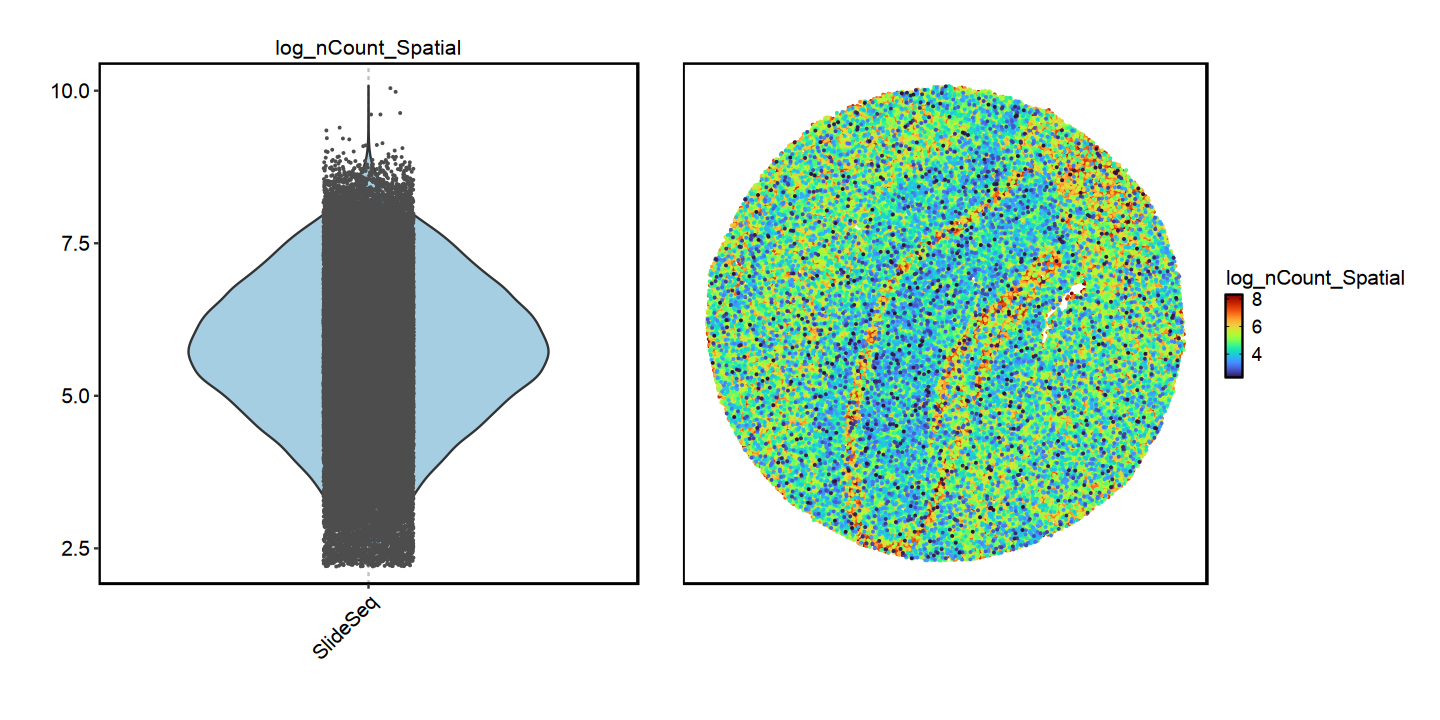

In [2]:
options(repr.plot.width = 12, repr.plot.height = 6)

slide.seq$log_nCount_Spatial <- log(slide.seq$nCount_Spatial)
p1 <- FeatureStatPlot(slide.seq, features = "log_nCount_Spatial",
    ident = "orig.ident", add_point = TRUE, legend.position = "none")
p2 <- SpatFeaturePlot(slide.seq, features = "log_nCount_Spatial", points_size = 0.5)

p1 + p2

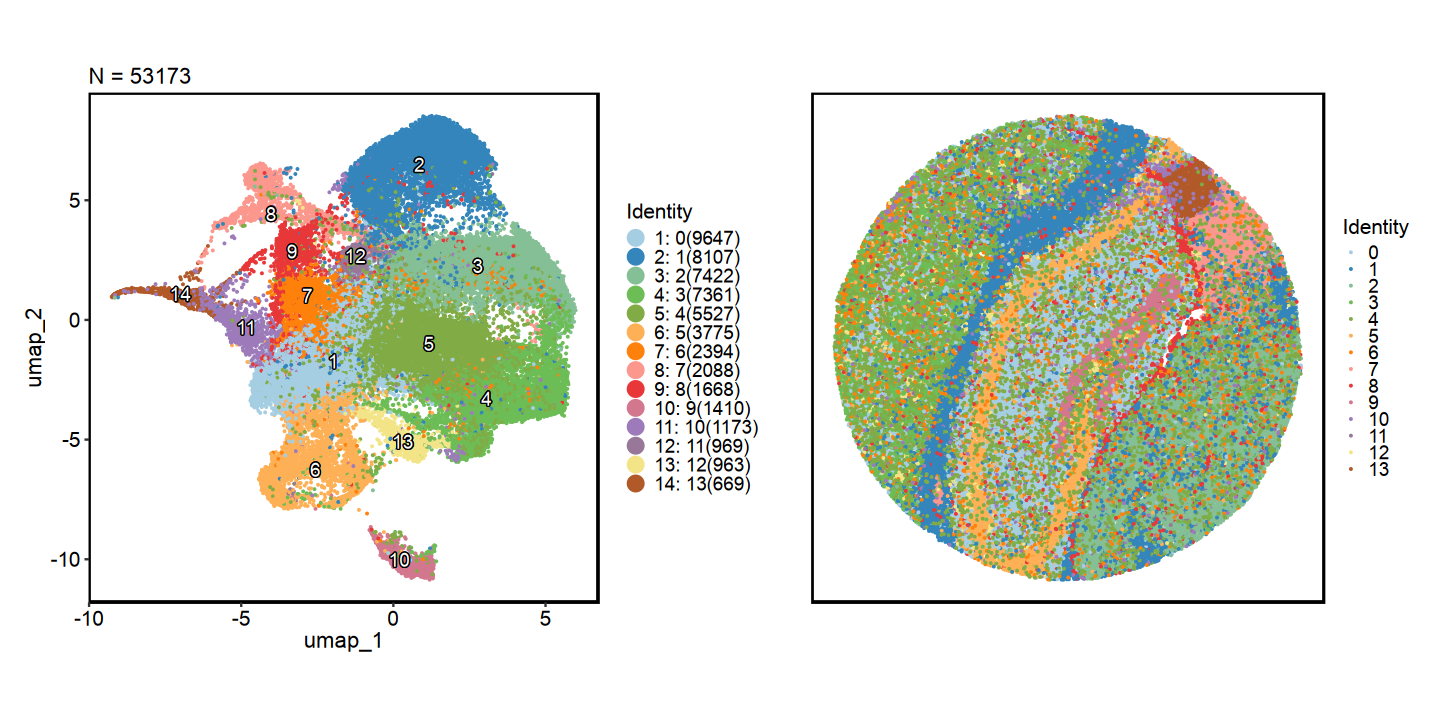

In [3]:
options(repr.plot.width = 12, repr.plot.height = 6)

p1 <- CellDimPlot(slide.seq, reduction = "umap", label = TRUE)
p2 <- SpatDimPlot(slide.seq, points_size = 0.5)

p1 + p2

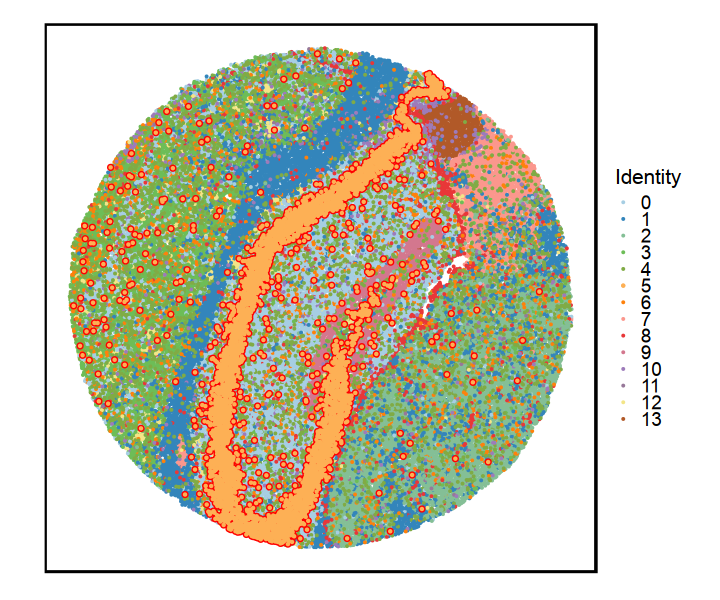

In [4]:
options(repr.plot.width = 6, repr.plot.height = 5)

SpatDimPlot(slide.seq, highlight = "seurat_clusters == 5",
    highlight_color = "red", points_size = 0.5, highlight_size = 0.2)

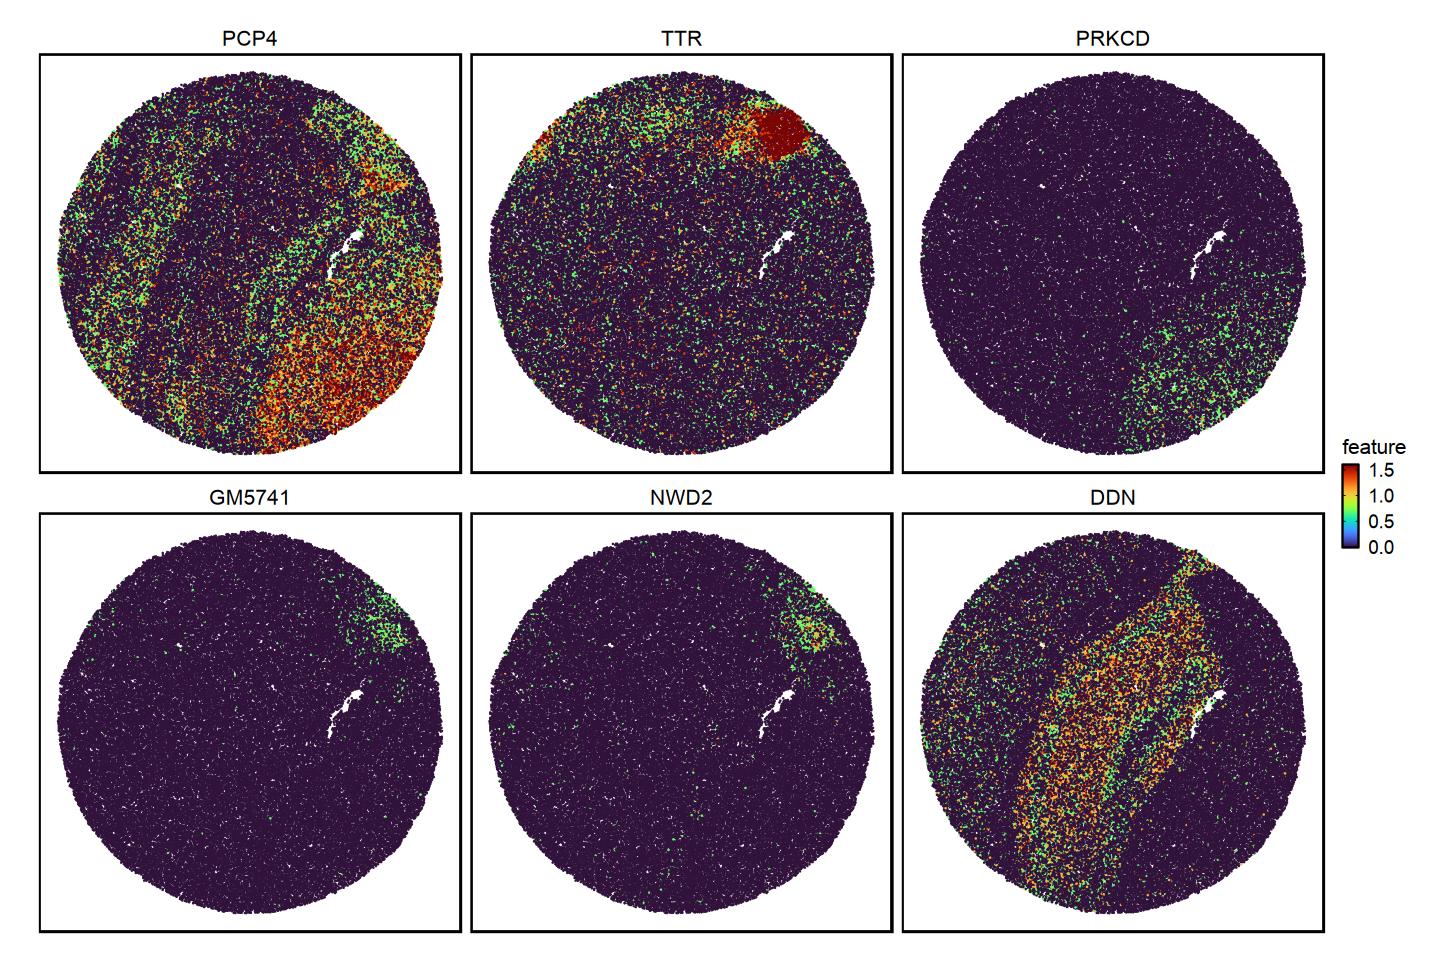

In [7]:
options(repr.plot.width = 12, repr.plot.height = 8)

SpatFeaturePlot(slide.seq, size = 0.1,
    features = c("PCP4", "TTR", "PRKCD", "GM5741", "NWD2", "DDN"))

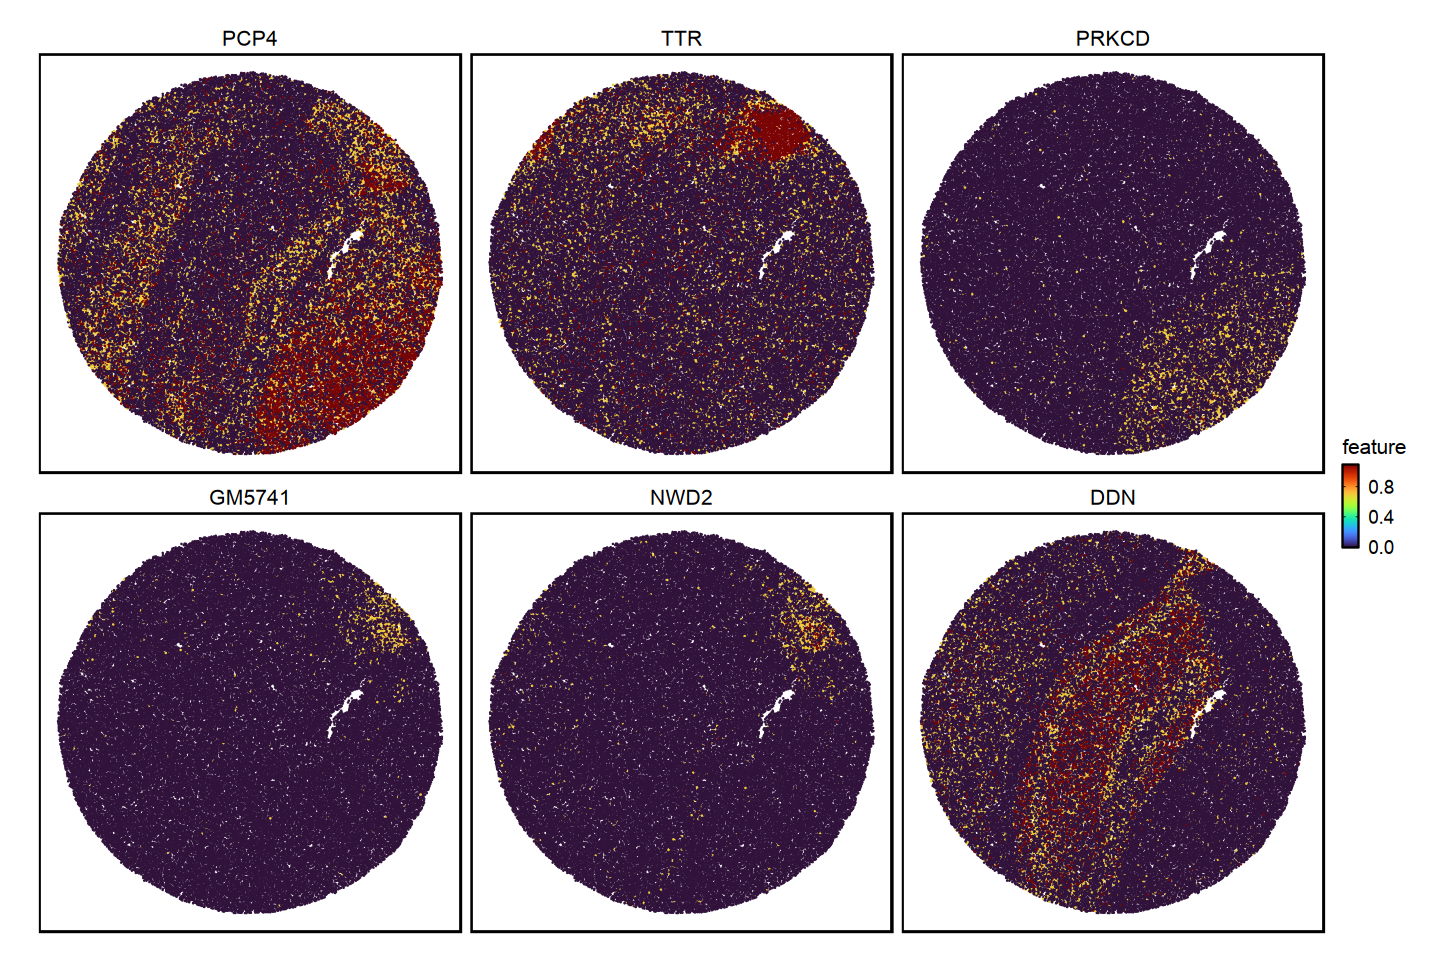

In [8]:
options(repr.plot.width = 12, repr.plot.height = 8)

SpatFeaturePlot(slide.seq, size = 0.1, upper_quantile = 0.95,
    features = c("PCP4", "TTR", "PRKCD", "GM5741", "NWD2", "DDN"))

In [6]:
x <- sessionInfo()
x <- capture.output(print(x))
# hide the BLAS/LAPACK paths
x <- x[!startsWith(x, "BLAS/LAPACK:")]
cat(paste(x, collapse = "\n"))

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=C              
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] scplotter_0.4.0            stxKidney.SeuratData_0.1.0
 [3] stxBrain.SeuratData_0.1.2  ssHippo.SeuratData_3.1.4  
 [5] pbmc3k.SeuratData_3.1.4    bmcite.SeuratData_0.3.0   
 [7] SeuratData_0.2.2.9001      Seurat_5.3.0              
 [9] SeuratObject_5.0.2         sp_2.1-4                  

loaded v